In [112]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [113]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

itens_pedidos  = pd.read_csv(url_itens_pedidos)         
pedidos        = pd.read_csv(url_pedidos) 
produtos        = pd.read_csv(url_produto) 
vendedores     = pd.read_csv(url_vendedores)         

engine = create_engine('sqlite:///:memory:')

produtos.to_sql('tb_produtos',engine,index = False)
itens_pedidos.to_sql('tb_itens_pedidos',engine,index = False)
pedidos.to_sql('tb_pedidos',engine,index = False)
vendedores.to_sql('tb_vendedores',engine,index = False)

inspetor = inspect(engine)
print(inspetor.get_table_names())


def df_sql(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados, columns= consulta.keys())

['tb_itens_pedidos', 'tb_pedidos', 'tb_produtos', 'tb_vendedores']


# Desafio 1


In [114]:
query = 'SELECT * FROM tb_produtos'
df_sql(query)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado
...,...,...,...,...,...,...
200,14074,Camisa Amarela Laco,450,Carol Bassi,309858,Usado
201,33349,Vestido Listras Malha,270,Calvin Klein,307118,Usado
202,22568,Casaqueto Estampa Geometrica,245,Zara,244931,Usado
203,40508,Regata Bicolor Alcinha,245,Express,247166,Usado


In [115]:
df_sql('SELECT * FROM TB_ITENS_PEDIDOS')

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0
...,...,...,...,...,...,...,...,...
24522,25051,64127,63716,4,590,2360,BR-PE,472.0
24523,25052,37384,63999,4,700,2800,BR-RO,560.0
24524,25053,100932,64594,5,3900,19500,BR-RO,3900.0
24525,25054,3820,64811,3,139,417,BR-MA,83.4


In [116]:
receita =  df_sql('SELECT SUM(valor_total) as Receita FROM TB_ITENS_PEDIDOS')
receita

,Receita
0,45803930


In [117]:
df_produtos = df_sql('SELECT * FROM TB_PRODUTOS')

In [118]:
df_itens_pedidos =  df_sql('SELECT * FROM TB_ITENS_PEDIDOS')

In [119]:
receita = df_itens_pedidos['valor_total'].sum()
receita

45803930

# Desafio 2

In [120]:
df_sql(''' SELECT a.marca, count(*) as Quantidade_vendida 
           FROM tb_produtos as a
           LEFT JOIN TB_ITENS_PEDIDOS as b
           ON b.produto_id = a.produto_id
           GROUP BY a.marca
           ORDER BY Quantidade_vendida DESC
           LIMIT 15
       ''')

,marca,Quantidade_vendida
0,Zara,2721
1,Mixed,1673
2,Animale,1128
3,Le Lis Blanc,715
4,Banana Republic,584
5,Farm,506
6,H&m,446
7,Sacada,381
8,Shoulder,372
9,Dress&co,360


In [121]:
df_marcas = df_itens_pedidos.merge(df_produtos)

In [122]:
df_marcas

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete,produto,preco,marca,sku,Condicao
0,1,41518,341,3,260,780,BR-BA,156.0,Calca Jeans Basica,260,Banana Republic,255410,Novo com etiqueta
1,489,41518,15598,3,260,780,BR-AP,156.0,Calca Jeans Basica,260,Banana Republic,255410,Novo com etiqueta
2,734,41518,28333,2,260,520,BR-MG,104.0,Calca Jeans Basica,260,Banana Republic,255410,Novo com etiqueta
3,792,41518,64689,5,260,1300,BR-DF,260.0,Calca Jeans Basica,260,Banana Republic,255410,Novo com etiqueta
4,932,41518,10711,5,260,1300,BR-SC,260.0,Calca Jeans Basica,260,Banana Republic,255410,Novo com etiqueta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24522,24048,29301,133955,6,180,1080,BR-SC,216.0,Blusa Renda Off,180,Espaço Fashion,307359,Usado
24523,24091,29301,22125,1,180,180,BR-RR,36.0,Blusa Renda Off,180,Espaço Fashion,307359,Usado
24524,24310,29301,19830,5,180,900,BR-SE,180.0,Blusa Renda Off,180,Espaço Fashion,307359,Usado
24525,24470,29301,114271,6,180,1080,BR-BA,216.0,Blusa Renda Off,180,Espaço Fashion,307359,Usado


In [123]:
df_marcas = df_marcas.groupby(['marca'])['quantidade'].count()

In [124]:
df_marcas  = pd.DataFrame(df_marcas).reset_index()
df_marcas.sort_values('quantidade', ascending = True , inplace= True)
df_marcas.reset_index(drop = True, inplace= True)


In [125]:
df_marcas[:15]

,marca,quantidade
0,Talie Nk,94
1,Track & Field,96
2,Ateliê de Calças,99
3,Bottega Veneta,101
4,Seal Brasil,103
5,Bcbgmaxzria,103
6,Daslu,104
7,My Shoes,105
8,Express,105
9,Carina Duek,105


In [128]:
df_marcas[-15:]

,marca,quantidade
102,Colcci,260
103,Hollister,266
104,Tigresse,347
105,Forever 21,352
106,Forum,353
107,Dress&co,360
108,Shoulder,372
109,Sacada,381
110,H&m,446
111,Farm,506


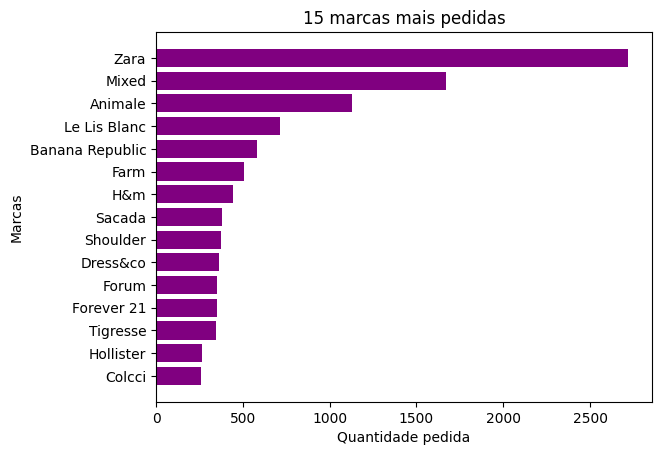

In [131]:
plt.barh(df_marcas['marca'][-15:], df_marcas['quantidade'][-15:], color = 'purple', )
plt.title('15 marcas mais pedidas')
plt.xlabel('Quantidade pedida')
plt.ylabel('Marcas')
plt.show()